# Part 2 - The Impact of Employment Status, Average Credit Score, and Recommendations on Loan Approval


## Investigation Overview

In this investigation, i want to look at which of the features of a loan could be use to predict its' complete or default status. The main focus will be on employment status, average credit score and recommendations count.


## Dataset Overview

The dataset comprises 113,937 records of Prosper loan data, encompassing loan status along with various attributes such as borrower rate (interest rate), employment status, recommendations count, borrower income, and more.

To create a subset, only loan status values categorized as "Completed," "Defaulted," or "ChargedOff" were included, as well as credit score ranges greater than or equal to 400.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
# Read the dataset
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# subset and create required column
prosper_loan['AverageCreditScore'] = (prosper_loan.CreditScoreRangeUpper + prosper_loan.CreditScoreRangeLower)/2
prosper_loan_sub = prosper_loan.query('LoanStatus in ["Completed", "Defaulted", "Chargedoff"] &\
                                     AverageCreditScore>=400')

## Loan Status Distribution

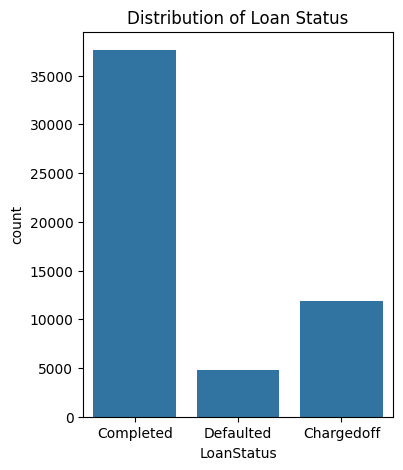

In [4]:
plt.figure(figsize=(4, 5));
b_color=sb.color_palette()[0]
sb.countplot(x='LoanStatus', data=prosper_loan_sub, color=b_color)
plt.title('Distribution of Loan Status');

Loan status is represented as a categorical variable, and the count plot illustrates that the dataset contains a higher number of completed loans compared to the number of defaults.

## Distribution of Employment Status

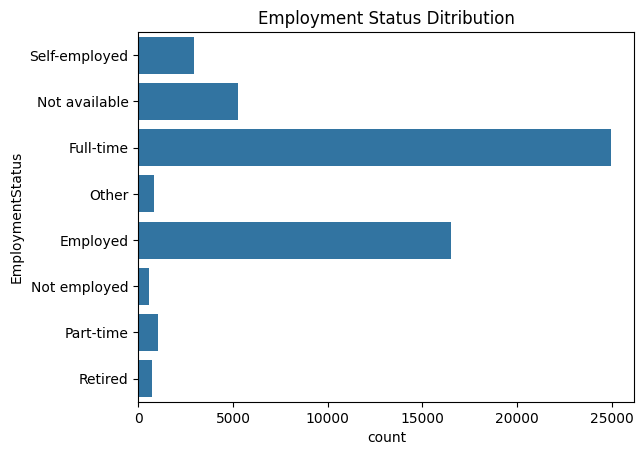

In [5]:
sb.countplot(y='EmploymentStatus', data =prosper_loan_sub, color= b_color);
plt.title('Employment Status Ditribution');

The dataset exhibits a higher representation of employed individuals compared to unemployed individuals based on their respective employment statuses.

## Distribution of Average Credit Score

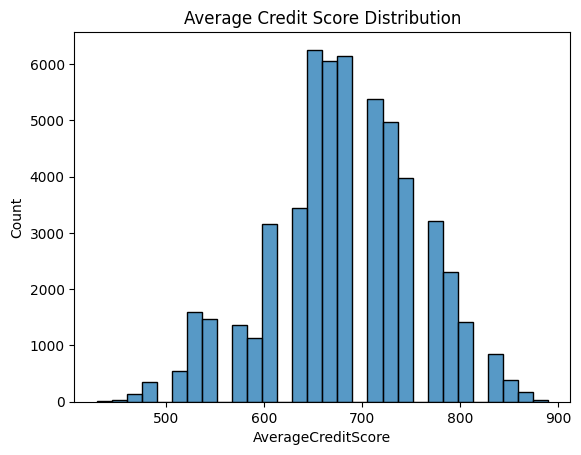

In [6]:
sb.histplot(x='AverageCreditScore', data=prosper_loan_sub, bins=30, kde=False)
plt.title('Average Credit Score Distribution');

The average credit score distribution demonstrates a slight normal pattern, with the majority of values concentrated within the range of 600 to 800.

## Recommendation count distribution

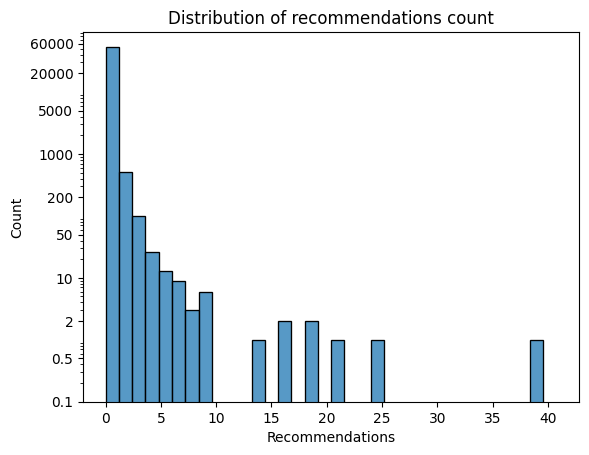

In [7]:
bins = np.arange(0, 40+1.2, 1.2)
sb.histplot(x='Recommendations', data=prosper_loan_sub, bins=bins);
plt.yscale('log')
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
plt.yticks(yticks, yticks)
plt.title('Distribution of recommendations count');

Distribution highlights a majority of counts below 10, with only a few values surpassing this Threshold.

## Loan Status vs Employment Status

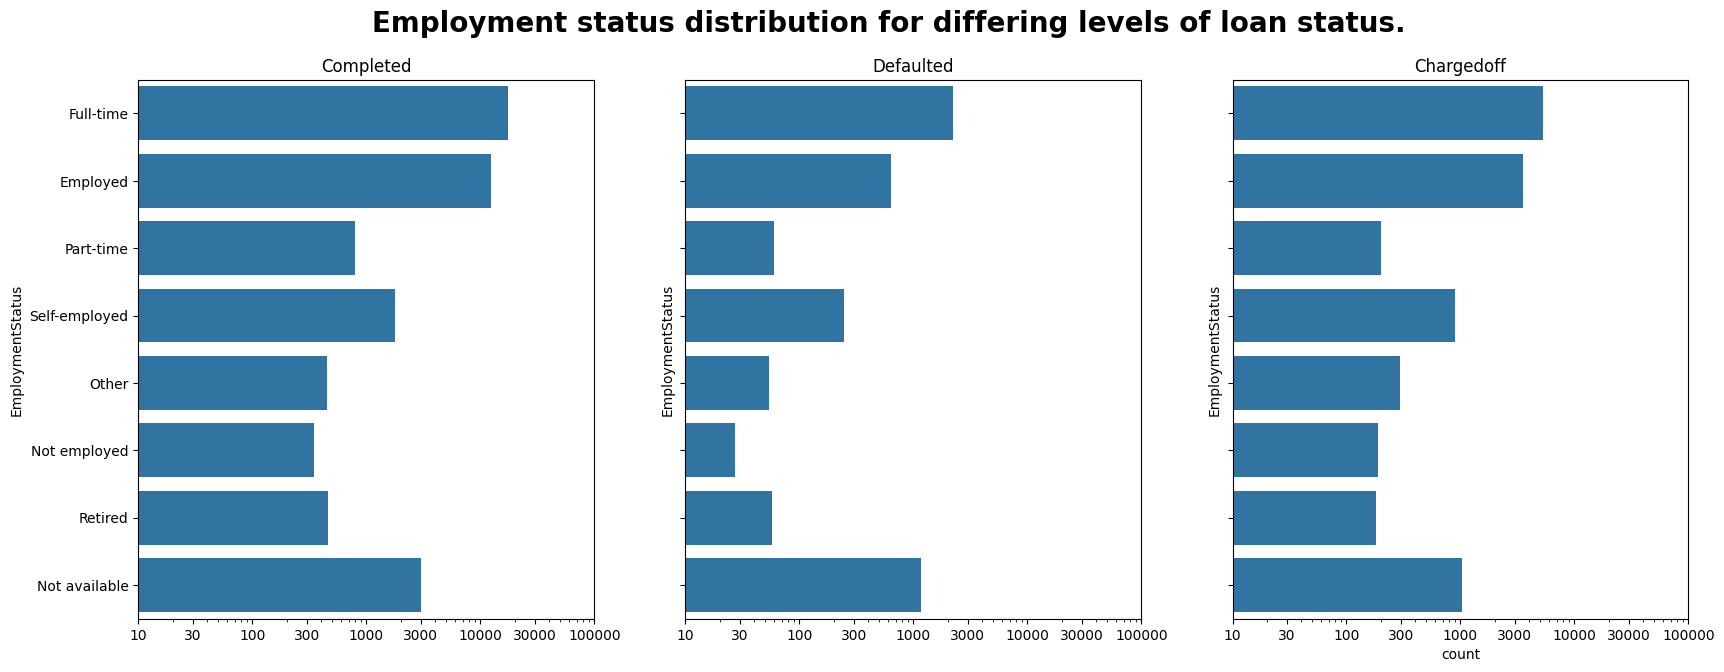

In [8]:
fig, ax=plt.subplots(ncols=3, figsize=(20,7), sharex=True, sharey=True)
xticks=[10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
y_order = ['Full-time', 'Employed', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired', 'Not available']

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Completed"'), y='EmploymentStatus', ax=ax[0], color=b_color, order=y_order)
ax[0].set_title('Completed')
ax[0].set_xlabel('')

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Defaulted"'), y='EmploymentStatus', ax=ax[1], color=b_color, order=y_order)
ax[1].set_title('Defaulted')
ax[1].set_xlabel('')

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Chargedoff"'), y='EmploymentStatus', ax=ax[2], color=b_color, order=y_order)
ax[2].set_title('Chargedoff')

plt.xscale('log')
plt.xticks(xticks,xticks);
fig.suptitle('Employment status distribution for differing levels of loan status.', fontsize=20, fontweight='bold');

The majority of loan recipients are typically employed and have verifiable income sources. Based on this distribution, the following conclusions can be drawn:

1. Loans given to fully employed individuals (Employed, Full-time, Part-time) have a higher completion count compared to defaults.

2. Loans given to individuals in categories other than those mentioned above have default counts equal to or greater than 50% of their completion count.

These findings imply that fully employed individuals are less likely to default on their loans compared to those who are not fully employed.

### Loan Status and employment status by average credit score

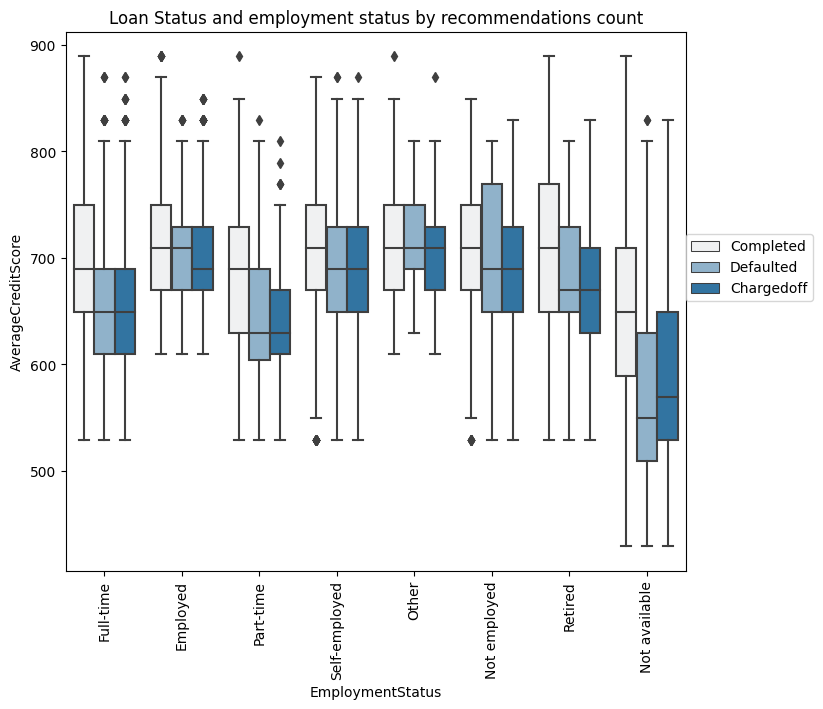

In [9]:
fig, ax=plt.subplots(nrows=1, figsize=(8, 7))
sb.boxplot(data=prosper_loan_sub, y='AverageCreditScore', 
           order=y_order, x='EmploymentStatus', ax=ax, hue='LoanStatus', color = b_color)
plt.legend(loc=(1, 0.5))
plt.xticks(rotation=90)
plt.title('Loan Status and employment status by recommendations count');

Loan completion rates are higher among fully employed individuals. However, fully employed borrowers who default on their loans exhibit lower average credit scores compared to those who successfully repay their loans. Notably, the highest likelihood of loan default is observed among individuals who select "Not available" as their employment status, with a majority of them also having average credit scores below 650.

### Loan Status and employment status by recommendations count

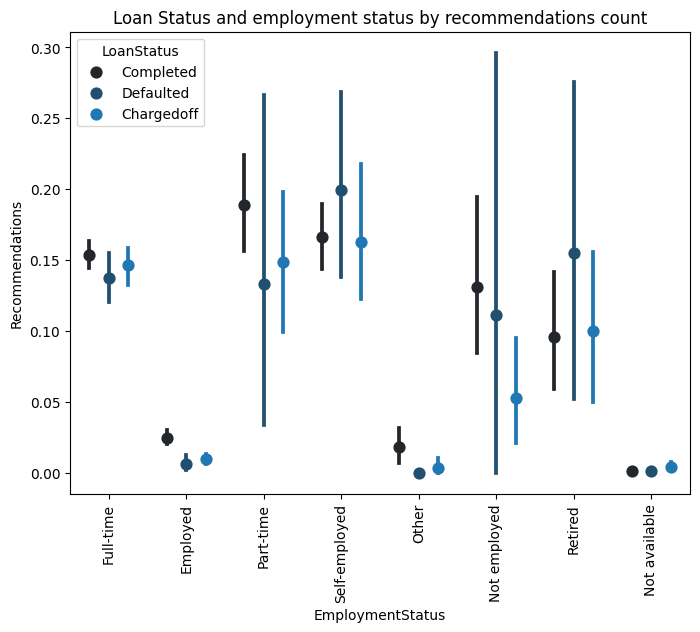

In [10]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='Recommendations', data=prosper_loan_sub, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=y_order, color = b_color)
plt.xticks(rotation=90)
plt.title('Loan Status and employment status by recommendations count');

Individuals classified as full-time employees receive more recommendations than those in other employment categories, and they also exhibit a higher loan completion rate.